# Project -1

## Sales Prediction (Simple Linear Regression)

## Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

## Steps for building a regression model using Python:

1. Import pandas and numpy libraries
2.  Use `read_csv` to load the dataset into DataFrame.
3. Identify the feature(s) (`X`) and outcome (`Y`) variable in the DataFrame for building the model.
4. Split the dataset into training and validation sets using `train_test_split()`.
5. Import statsmodel library and fit the model using `OLS()` method.
6.  Print model summary and conduct model diagnostics.

## Data
- Data is available at https://www.kaggle.com/datasets/ashydv/advertising-dataset?select=advertising.csv
- contains the salary of 50 graduating MBA students of a Business School in 2016 and their corresponding percentage marks in grade 10
  
  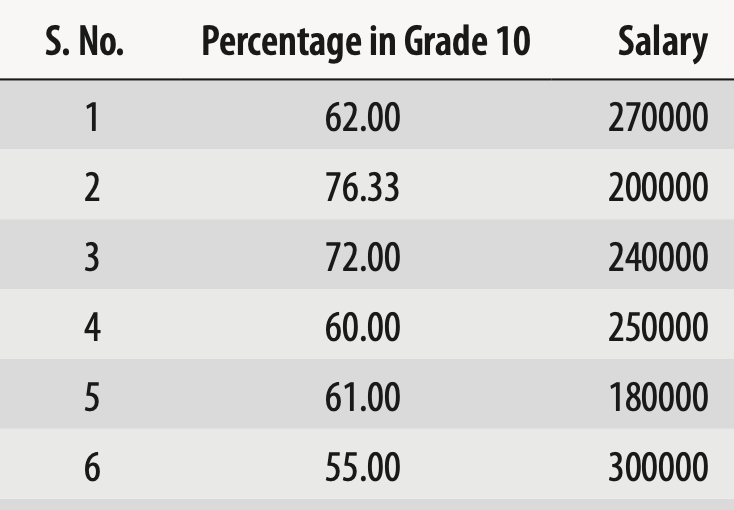

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

## Building simple linear regression model

### Importing important libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

np.set_printoptions(precision=4, linewidth=100)

### Data file path

In [4]:
# Provide the relative path to the data file
file_path = "../ml-data/MBA-Salary.csv"

### Importing the data file

In [5]:
# importing the data file
mba_salary_df = pd.read_csv(file_path)
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


### Checking infromation about the dataset

In [8]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [19]:
mba_salary_df.dtypes

S. No.                      int64
Percentage in Grade 10    float64
Salary                      int64
dtype: object

In [22]:
mba_salary_df.shape

(50, 3)

In [45]:
mba_salary_df.columns

Index(['S. No.', 'Percentage in Grade 10', 'Salary'], dtype='object')

### Checking few plots

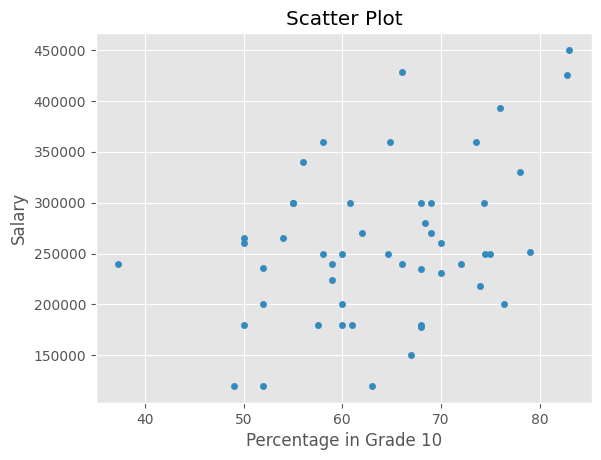

In [48]:
# scatter plot
mba_salary_df.plot.scatter(x='Percentage in Grade 10', y='Salary')
plt.xlabel('Percentage in Grade 10')
plt.ylabel('Salary')
plt.title('Scatter Plot')
plt.show()

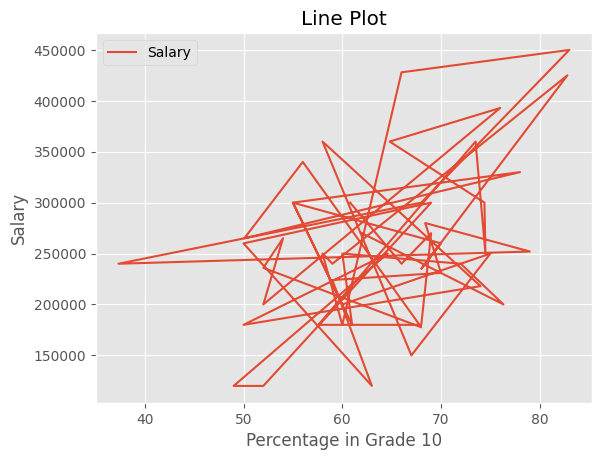

In [49]:
# line plot

mba_salary_df.plot.line(x='Percentage in Grade 10', y='Salary')
plt.xlabel('Percentage in Grade 10')
plt.ylabel('Salary')
plt.title('Line Plot')
plt.show()

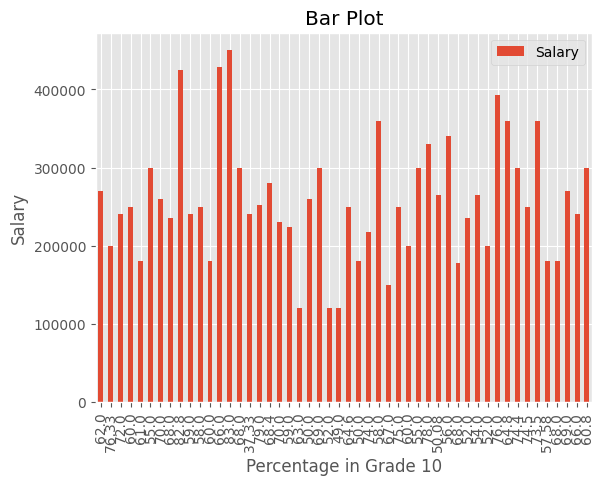

In [50]:
# bar plot
mba_salary_df.plot.bar(x='Percentage in Grade 10', y='Salary')
plt.xlabel('Percentage in Grade 10')
plt.ylabel('Salary')
plt.title('Bar Plot')
plt.show()

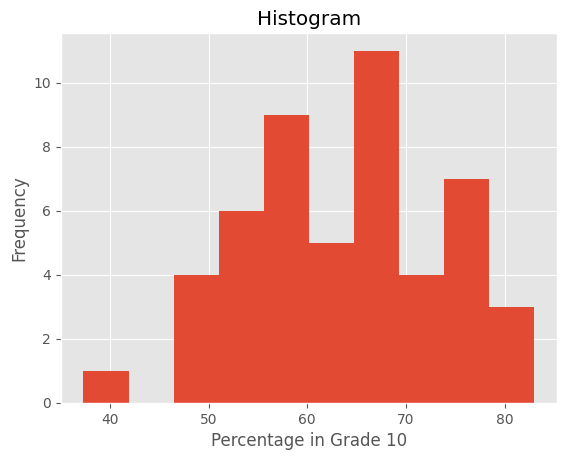

In [51]:
# Histogram

mba_salary_df['Percentage in Grade 10'].plot.hist()
plt.xlabel('Percentage in Grade 10')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

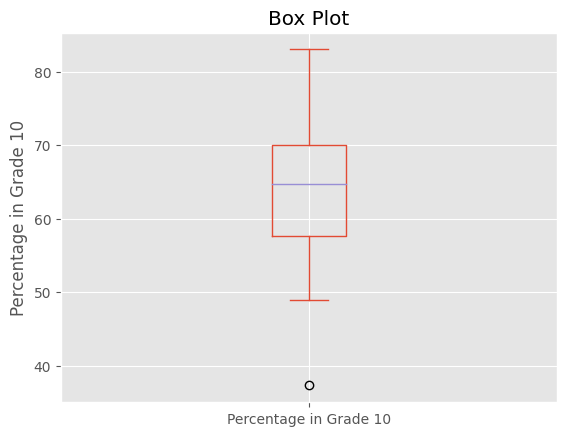

In [52]:
# Box plot

mba_salary_df['Percentage in Grade 10'].plot.box()
plt.ylabel('Percentage in Grade 10')
plt.title('Box Plot')
plt.show()

### Importing statsmodel library for linear regression analysis

- The statsmodel library is used in python for building statistical models. 
- OLS (Ordinary Least Squares) API available in statsmodel.api is used for estimation of the parameters for simple linear regression model. 
- The OLS model takes two parameters Y and X.

In [11]:
# if you encounter `ModuleNotFoundError` for statsmodel then install it using
%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Creatin the two parameters
- In the present case, 'Percentage in Grade 10' will be X and Salary will be Y.
- OLS API available in statsmodel.api estimates only the coeffient of X parameter $Y=\beta_0+\beta_1 X+\epsilon$.
- As the value of the columns remains same across all samples, the parameter estimated for this feature or column will be the intercept term.

In [13]:
# Creating feature Set(X) and Outcome Variable (Y)
import statsmodels.api as sm

X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [15]:
Y = mba_salary_df['Salary']

### Splitting the Dataset into Training and Validation Sets

- `train_test_split()` function from `skelarn.model_selection` module provides the ability to split the dataset randomly into 
  - training and 
  - validation datasets. 
- The parameter `train_size` takes a fraction between `0` and `1` for specifying training set size. 
- The remaining samples in the original set will be 
  - test or 
  - validation set.
- The records that are selected for training and test set are randomly sampled. 
- The method takes a seed value in parameter named `random_state`, to fix which samples go to training and which ones go to test set.
- `train_test_split()` method returns four variables as below.
  1. `train_X` contains `X` features of the training set.
  2. `train_y` contains the values of response variable for the training set.
  3. `test_X` contains `X` features of the test set.
  4. `test_y` contains the values of response variable for the test set.

#### Importing Sklearn library

If it is not installed, use

`pip install scikit-learn`

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [18]:
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.8, random_state = 100 )

- `train_size` = 0.8 implies 80% of the data is used for training the model and the remaining 20% is used for validating the model.
- `random_state` = 100: This parameter sets the seed value for the random number generator. It ensures that the data splitting process is reproducible. 
- Using the same `random_state` value will produce the same train-test split each time the code is executed, which is useful for consistent results and debugging.

In [26]:
train_X.head()

,const,Percentage in Grade 10
0,1.0,62.00
11,1.0,60.00
18,1.0,70.00
45,1.0,57.58
38,1.0,54.00


In [24]:
test_X

,const,Percentage in Grade 10
6,1.0,70.0
36,1.0,68.0
37,1.0,52.0
28,1.0,58.0
43,1.0,74.5
49,1.0,60.8
5,1.0,55.0
33,1.0,78.0
20,1.0,63.0
42,1.0,74.4


In [27]:
test_y

6     260000
36    177600
37    236000
28    360000
43    250000
49    300000
5     300000
33    330000
20    120000
42    300000
Name: Salary, dtype: int64

### Fitting the Model

We will fit the model using OLS method and pass `train_y` and `train_X` as parameters.

In [28]:
mba_salary_lm = sm.OLS(train_y, train_X ).fit()

The `fit()` method on `OLS()` estimates the parameters and returns model information to the variable `mba_salary_lm`, which contains the model parameters, accuracy measures, and residual values among other details.

In [66]:
mba_salary_lm

### Printing Estimated Parameters and Interpreting Them

In [29]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [53]:
# beta_0
mba_salary_lm.params[0]

30587.285651523373

In [54]:
# beta_1
mba_salary_lm.params[1]

3560.587382863203

The estimated (predicted) model can be written as

`MBA Salary = 30587.285 + 3560.587 * (Percentage in Grade 10)`

The equation can be interpreted as follows: 
- For every 1% increase in Grade 10, the salary of the MBA students will increase by 3560.587.

<AxesSubplot: xlabel='Percentage in Grade 10', ylabel='Salary'>

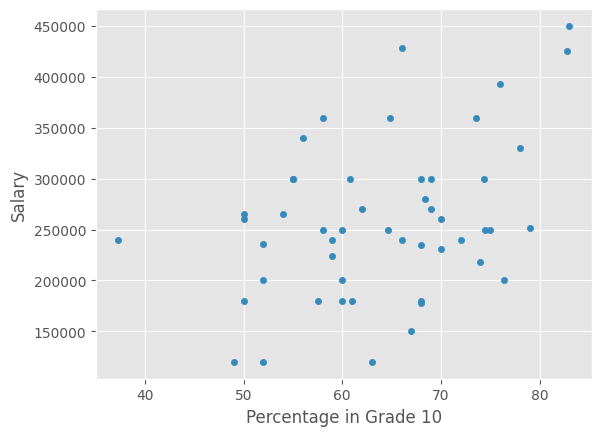

In [61]:
mba_salary_df.plot.scatter(x='Percentage in Grade 10', y='Salary')

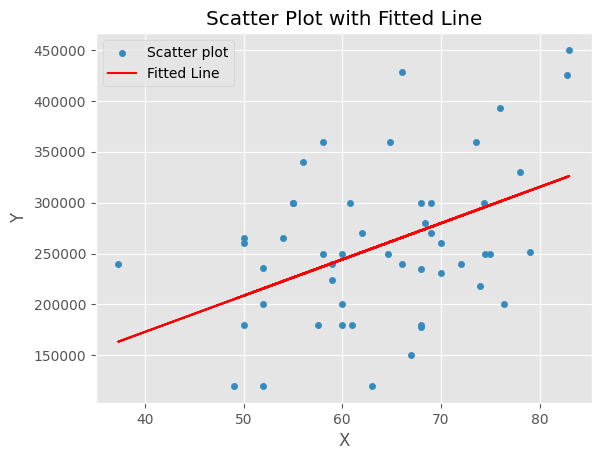

In [64]:
# Scatter plot of original data points
mba_salary_df.plot.scatter(x='Percentage in Grade 10', y='Salary', label = 'Scatter plot')

# Generate predicted values using the linear regression coefficients
MBA_salary = mba_salary_lm.params[0]+mba_salary_lm.params[1]*mba_salary_df['Percentage in Grade 10']

# Plot the fitted line
plt.plot(mba_salary_df['Percentage in Grade 10'], MBA_salary, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Fitted Line')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Model Diagnostics

It is important to validate the regression model to ensure its validity and goodness of fit before it can be used for practical applications. The following measures are used to validate the simple linear regression models:

1. Co-efficient of determination (R-squared).
2. Hypothesis test for the regression coefficient.
3. Analysis of variance for overall model validity (important for multiple linear regression).
4. Residual analysis to validate the regression model assumptions.
5. Outlier analysis, since the presence of outliers can significantly impact the regression parameters.


### 1. Co-efficient of Determination (R-Squared or $R^2$)

- The primary objective of regression is to explain the variation in `Y` using the knowledge of `X`. 
- The co-efficient of determination (R-squared or $R^2$) measures the percentage of variation in `Y` explained by the model $(\beta_0+\beta_1 x)$. 
- The simple linear regression model can be broken into:
    1. Variation in outcome variable explained by the model. 
    2. Unexplained variation as shown in Eq.

        $\underbrace{Y_i}_{\text{Variation in Y}} = \underbrace{\beta_0 + \beta_1 X_i}_{\text{Variation in Y explained by the model}} + \underbrace{\epsilon_i}_{\text{Variation in Y not explained by the model}}$
    
        It can be proven mathematically that

        $\underbrace{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}_{SST} = \underbrace{\sum_{i=1}^{n} (\hat{Y}_i - \bar{Y})^2}_{SSR} + \underbrace{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}_{SSE}$

        where $\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i$ is the predicted value of $Y_i$.

        $\hat{\beta}_1 = \sum \frac{(X_i-\bar{X})(\bar{Y}_i-\bar{Y})}{(X_i-\bar{X})^2}$

        $\hat{\beta}_0 = \bar{Y} - \beta_1 \bar{X}$

        - The hat ($\hat{\beta}_{0 ~\text{or} ~1}$) symbol is used for denoting the estimated value. 
        - SST = is the sum of squares of total variation $\Rightarrow \sum_{i=1}^{n} (\hat{Y}_i - \bar{Y})^2$, 
        - SSR = is the sum of squares of explained variation due to the regression model, and
        - SSE = is the sum of squares of unexplained variation (error) $\Rightarrow \text{SSE}=\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$.

        $\boxed{R^2 = 1 - \frac{SSE}{SST}}$ 
        
        - Mathematically, R-squared ($R^2$) is square of correlation coefficient ($R^2 = r^2$), where $r$ is the Pearson correlation co-efficient.
        - Higher R-squared indicates better fit; however, one should be careful about the spurious relationship.

<div style="background-color: #f9f9f9; border: 1px solid #ddd; padding: 10px;">

**Assumptions of the Linear Regression Model**
    
1. The errors or residuals $\epsilon_i$ are assumed to follow a normal distribution with expected value of error $\Rightarrow E(\epsilon_i)=0$.
2. The variance of error, $\text{VAR}(\epsilon_i)$, is constant for various values of independent variable $X$. This is known as homoscedasticity. When the variance is not constant, it is called heteroscedasticity.
3. The error and independent variable are uncorrelated.
4. The functional relationship between the outcome variable and feature is correctly defined.

**Properties of Simple Linear Regression**

1. The mean value of $Y_i$ for given $X_i$, $\Rightarrow \bar{Y}_i = E(Y_i | X) = \hat{\beta}_0 + \hat{\beta_1} X$.
2. $Y_i$ follows a normal distribution with mean $\hat{\beta}_0 + \hat{\beta_1} X$ and variance $\text{Var}(\epsilon_i)$
</div>

### 2. Hypothesis Test for the Regression Co-efficient

- The regression co-efficient ($\beta_1$) captures the existence of a linear relationship between the outcome variable and the feature. 
- If $\beta_1 = 0$, we can conclude that there is no statistically significant linear relationship between the two variables. 
- It can be proved that the sampling distribution of $\beta_1$ is a t-distribution (`Kutner et al., 2013`; `U Dinesh Kumar, 2017`).
- The null and alternative hypotheses are
    
    - $H_0:\beta_1 = 0$
    - $H_1: \beta_1 \neq 0$.

- **t-test:** $t_{\alpha/2, n-2} = \frac{\hat{\beta}_1}{S_e(\hat{\beta}_1 )}$.
- **standard error of estimate of the regression co-efficient**: 
  
  $S_e(\hat{\beta}_1) = \frac{S_e}{\sqrt{(X_i - \bar{X})^2}}$

  where $S_e$ is the standard error of the estimated value of $Y_i$ (and the residuals) and is given by

  $S_e = \sqrt{\frac{Y_i-\hat{Y}_i}{n-2}}$.

  The hypothesis test is a two-tailed test. The t-test is a t-distribution with n − 2 degrees of freedom (two degrees of freedom are lost due to the estimation of two regression parameters $\beta_0$ and $beta_1$).

  $S_e(\beta_1)$ is the standard error of regression co-efficient $\beta_1$.

### 3. Analysis of Variance (ANOVA) in Regression Analysis

We can check the overall validity of the regression model using ANOVA in the case of multiple linear regression model with k features. The null and alternative hypotheses are given by

- $H_0: \beta_1 = \beta_2 = ... = \beta_k = 0$.
- $H_A:$ Not all regression coefficients are zero.

The corresponding F-statistic is given by

$F=\frac{MSR}{MSE} = \frac{SSR/k}{SSE/(n-k-1)}$

where 

- $\text{MSR}= \text{SSR}/k$ and 
- $\text{MSE} = \text{SSE}/(n − k − 1) \Rightarrow$ are mean squared regression and mean squared error, respectively. 
- F-test is used for checking whether the overall regression model is statistically significant or not.

### 4. Residual Analysis

- Residuals or errors are the difference between the actual value of the outcome variable and the predicted $(Y_i-\hat{Y}_i)$. 
- Residual (error) analysis is important to check whether the assumptions of regression models have been satisfied. 
- It is performed to check the following

    1. The residuals are normally distributed.
    2. Variance of residual is constant (homoscedasticity).
    3. The functional form of regression is correctly specified.
    4. There are no outliers.

## Regression Model Summary Using Python

The function `summary2()` prints the model summary which contains the information required for diagnosing a regression model 

### 1. $R^2$, t-test and p-test

In [30]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2023-06-20 10:12      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

The output can be separated in three tables as follows:

In [33]:
mba_salary_lm.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.190
1,Dependent Variable:,Salary,AIC:,1008.8680
2,Date:,2023-06-20 10:15,BIC:,1012.2458
3,No. Observations:,40,Log-Likelihood:,-502.43
4,Df Model:,1,F-statistic:,10.16
5,Df Residuals:,38,Prob (F-statistic):,0.00287
6,R-squared:,0.211,Scale:,5.0121e+09


In [34]:
mba_salary_lm.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30587.285652,71869.449679,0.425595,0.672804,-114904.808889,176079.380192
Percentage in Grade 10,3560.587383,1116.925833,3.187846,0.002867,1299.489245,5821.685521


In [35]:
mba_salary_lm.summary2().tables[2]

,0,1,2,3
0,Omnibus:,2.048,Durbin-Watson:,2.611
1,Prob(Omnibus):,0.359,Jarque-Bera (JB):,1.724
2,Skew:,0.369,Prob(JB):,0.422
3,Kurtosis:,2.300,Condition No.:,413


- The model R-squared value is $R^2=$`0.211`, that is, the model explains `21.1%` of the variation in salary.
- The p-value for the t-test is `0.0029` which indicates that there is a statistically significant relationship (at significance value $\alpha = 0.05$) between the feature, percentage in grade `10`, and salary.
- Also, the probability value of F-statistic of the model is `0.0029` which indicates that the overall model is statistically significant. 
- Note that, in a simple linear regression, the p-value for t-test and F-test will be the same since the null hypothesis is the same. (Also $F = t^2$ in the case of SLR.)

### 2. Check for Normal Distribution of Residual

In [42]:
mba_salary_resid1 =  mba_salary_lm.resid_pearson
 
mba_salary_resid1 

array([ 0.2635, -0.9071, -0.6897, -0.7854,  0.5952, -0.1497, -0.4042,  1.554 ,  0.0829, -0.5326,
       -0.0885, -0.6246,  1.0393, -0.2354,  0.7258,  1.7499, -1.4459, -0.9574,  2.2941, -1.0745,
        1.2968,  0.3352, -1.683 , -0.0093, -0.8457,  0.9564, -0.3614, -1.3095,  0.3855,  1.394 ,
       -0.6632,  0.7924, -0.6728,  0.1822,  1.0805, -1.3523, -0.2223,  0.0816, -1.2014,  1.4068])

<Figure size 1200x800 with 0 Axes>

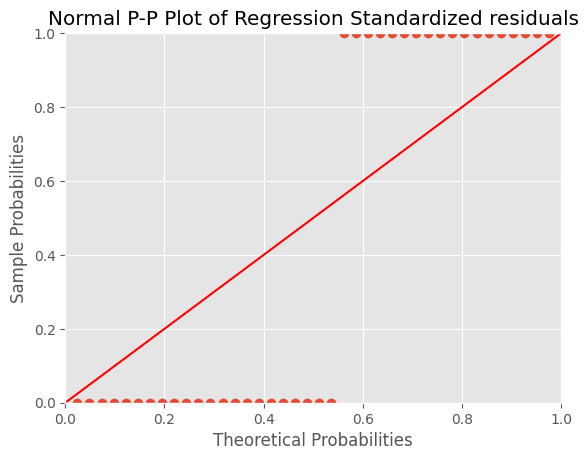

In [68]:
# Check for Normal Distribution of Residual
# The normality of residuals can be checked using the probability−probability plot (P-P plot)
# In Python, ProbPlot() method on statsmodel draws the P-P plot

mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot(mba_salary_resid)
plt.figure( figsize = (12, 8))
probplot.ppplot( line='45' )
plt.title("Normal P-P Plot of Regression Standardized residuals")

plt.show()

ABove can be done again in different way as follows:

<Figure size 800x600 with 0 Axes>

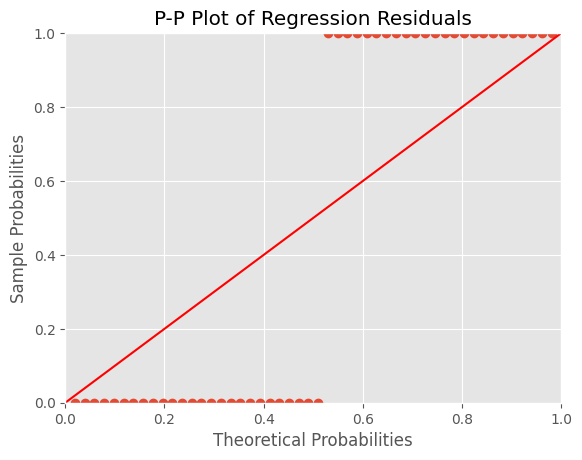

In [72]:
# residue calculation

fitted_values = mba_salary_lm.params[0] + mba_salary_lm.params[1] * mba_salary_df['Percentage in Grade 10']

residuals = mba_salary_df['Salary'] - fitted_values

probplot = sm.ProbPlot(residuals)

plt.figure(figsize=(8, 6))
probplot.ppplot(line='45') 

#The line='45' argument specifies that the plot should include a 45-degree line, which represents perfect normality.


plt.title("P-P Plot of Regression Residuals")
plt.show()


Clearly the dots in the P-P plot of regression residuals are parallel to the X-axis and do not closely follow the diagonal line (representing the cumulative distribution of a normal distribution), it suggests that the residuals deviate from a normal distribution.

There could be several reasons for this behavior:

- Nonlinearity: The relationship between the independent variables and the dependent variable may not be strictly linear. In such cases, the residuals may exhibit non-normal patterns.
- Heteroscedasticity: The variability of the residuals may change across different ranges of the independent variable. This violates the assumption of constant variance, which can affect the normality of the residuals.
- Outliers: The presence of outliers in the data can distort the residuals and make them deviate from a normal distribution.
- Missing variables: If important variables that affect the dependent variable are not included in the model, the residuals may exhibit non-normal patterns.
- Data transformation: If the data is not transformed appropriately (e.g., using logarithmic transformation), it can lead to non-normal residuals.

In [69]:
residuals

0      18656.296611
1    -102366.920585
2     -46949.577218
3       5777.471377
4     -67783.116006
5      73580.408291
6     -19828.402452
7     -37707.227686
8      99596.079047
9       -661.941240
10     12898.646142
11    -64222.528623
12    162413.947080
13    123883.961571
14     27292.772314
15     76495.987346
16    -59873.688898
17      5868.537361
18    -48828.402452
19    -16661.941240
20   -134904.290772
21     51383.345205
22     23732.184931
23    -95737.829560
24    -85056.067412
25    -10601.230584
26    -28616.654795
27    -76070.751983
28    122898.646142
29   -119146.640303
30    -47631.339366
31    -44222.528623
32     73580.408291
33     21686.898485
34     56098.498215
35    110019.820908
36    -95107.227686
37     20262.170440
38     42140.995674
39    -15737.829560
40     91808.073251
41     98686.651939
42      4505.013063
43    -45851.045675
44     67709.541708
45    -55605.907157
46    -92707.227686
47     -6267.815069
48    -25586.052920
49     52929.001470


### 3. Test of Homoscedasticity